<a href="https://colab.research.google.com/github/kshitijain902/Machine_learning/blob/main/kaggle_fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [397]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/dataset/fish.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [398]:
df2=pd.get_dummies(df)
df2

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [399]:
x=df2.iloc[:,[2,3,4,5,6,7,8,9,10,11,12]].values
y=df2.iloc[:,1].values


In [400]:
print(f"{x.shape , y.shape}")

((159, 11), (159,))


In [401]:
x_train=x[:-60]

In [402]:
print(x_train.shape)

(99, 11)


In [403]:
x_test=x[-60:]

In [404]:
print(x_test.shape)

(60, 11)


In [405]:
y_train=y[:-60]

In [406]:
y_test=y[-60:]

In [407]:
print(y_train.shape,y_test.shape)

(99,) (60,)


In [408]:
u=np.mean(x_train,axis=0)
std=np.std(x,axis=0)
x_train=(x_train-u)/std
x_test=(x_test-u)/std

In [409]:
print(x_train.shape,x_test.shape)
print(u.shape)

(99, 11) (60, 11)
(11,)


In [410]:
a=np.mean(y,axis=0)
print(a)

26.247169811320756


In [411]:
print(a.shape)
b=np.std(y,axis=0)

()


In [412]:
print(b)

9.96495627814052


In [413]:
y_test=(y_test-a)/b

In [414]:
y_train=(y_train-a)/b

In [415]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

<ipython-input-416-2aba1eb0b1dd>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


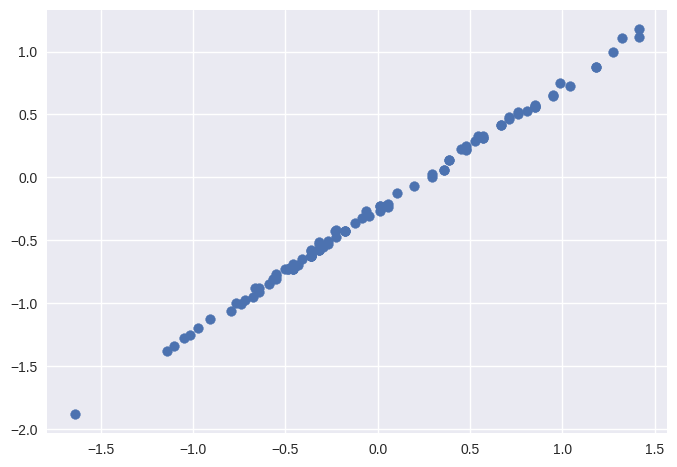

In [416]:
plt.style.use('seaborn')
plt.scatter(x_train[:, 0], y_train)
plt.show()




In [417]:
ones=np.ones((x_train.shape[0],1))
x_train=np.hstack((ones,x_train))

In [418]:
print(x_train[:5,])

[[ 1.         -0.04585963  0.07776266  0.39730796 -0.13290042  1.56026023
  -0.43785208 -0.57096971  0.         -0.60921351  0.         -0.31804739]
 [ 1.          0.03838971  0.18144621  0.62198984  0.03704959  1.56026023
  -0.43785208 -0.57096971  0.         -0.60921351  0.         -0.31804739]
 [ 1.          0.05711179  0.17280591  0.59807059  0.2694217   1.56026023
  -0.43785208 -0.57096971  0.         -0.60921351  0.         -0.31804739]
 [ 1.          0.29113774  0.38017301  0.68050075  0.12624954  1.56026023
  -0.43785208 -0.57096971  0.         -0.60921351  0.         -0.31804739]
 [ 1.          0.29113774  0.42337449  0.61356427  0.5299998   1.56026023
  -0.43785208 -0.57096971  0.         -0.60921351  0.         -0.31804739]]


In [419]:
def hypothesis(x, theta):
    return np.dot(x, theta)

In [420]:
def cost(X, Y, theta):
    m = X.shape[0]
    total_error = 0

    y_p = hypothesis(X, theta)
    total_error = np.sum((y_p - Y)**2)

    return total_error/m

In [421]:
def gradient(X, Y, theta):

    y_p = hypothesis(X, theta)

    grad = np.dot(X.T, (y_p - Y))

    return grad/X.shape[0]

In [422]:
def gradient_descent(X, Y, learning_rate = 0.01, max_steps = 600):

    m, n = X.shape
    theta = np.zeros((n, ))
    cost_epoch = []

    for i in range(max_steps):

        grad = gradient(X, Y, theta)

        e = cost(X, Y, theta)
        cost_epoch.append(e)

        theta = theta - learning_rate*grad

    return theta, cost_epoch

In [423]:
theta, cost_epoch = gradient_descent(x_train, y_train)

In [424]:
theta

array([-0.25105425,  0.22963861,  0.22512302,  0.17592172,  0.21501979,
       -0.0163005 , -0.0270686 ,  0.00859789,  0.        ,  0.01421632,
        0.        ,  0.02519859])

In [425]:
cost_epoch

[0.48155314957717504,
 0.4506994889387677,
 0.42217990574079906,
 0.3958119106233818,
 0.3714274051049316,
 0.34887154385363217,
 0.32800168698023513,
 0.3086864352273324,
 0.2908047414942081,
 0.2742450926556994,
 0.2589047561117139,
 0.24468908594440963,
 0.23151088396555178,
 0.2192898113099584,
 0.2079518465748006,
 0.19742878682114695,
 0.18765778804570887,
 0.17858094199923025,
 0.17014488647519616,
 0.1623004464202002,
 0.15500230342695118,
 0.14820869136394865,
 0.1418811160736216,
 0.13598409723442226,
 0.13048493063310293,
 0.12535346923221252,
 0.1205619215456653,
 0.11608466595293959,
 0.11189807969084543,
 0.10798038136160935,
 0.1043114858879279,
 0.10087287093027339,
 0.09764745385966837,
 0.09461947845090742,
 0.09177441052729009,
 0.08909884184878038,
 0.08658040159154422,
 0.08420767481841905,
 0.08197012738738324,
 0.07985803678885203,
 0.07786242844291598,
 0.07597501702474373,
 0.07418815242053597,
 0.07249476994788025,
 0.07088834450332895,
 0.06936284832670099,
 

In [426]:
ones=np.ones((x_test.shape[0],1))
x_test=np.hstack((ones,x_test))


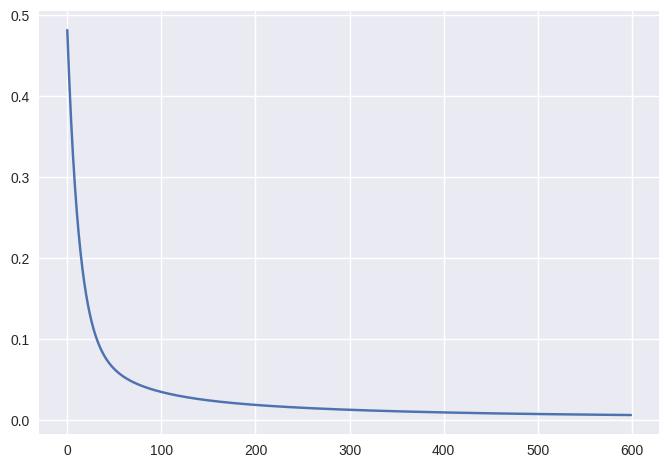

In [427]:
plt.plot(cost_epoch)

In [428]:
y_pred_test=[]
for i in range(x_test.shape[0]):
    pred=hypothesis(x_test[i],theta)
    y_pred_test.append(pred)
y_pred_test=np.array(y_pred_test)

In [429]:
for i in range(len(y_pred_test)):
    print(y_pred_test[i],y_test[i])

-0.5094983916440406 -0.32585891203997175
-0.41079583932840846 -0.27568307724009233
-0.35916069587004607 -0.12515557284045406
-0.15369925420792432 -0.10508523892050238
-0.29575239895847727 -0.08501490500055067
-0.30051203909941626 -0.08501490500055067
-0.261410642889693 -0.08501490500055067
-0.26511993854453797 -0.03483907020067126
-0.1909682340068722 0.06551259939908759
-0.11516726221519012 0.15582910203887076
0.2505924504258915 0.4267786099582196
0.39236824703389145 0.5773061143578578
0.6495786733381623 0.6274819491577373
0.5706706924016837 0.7780094535573755
0.5193479908889638 0.7780094535573755
0.5106120878035121 0.8281852883572549
0.5108769467676082 0.838220455317231
0.7621510406967629 1.0288886275567726
0.5714538712380236 1.0288886275567726
0.7953441107022586 1.0389237945167487
0.7842462857103139 1.069029295396676
0.7951344247799805 1.079064462356652
0.850360324411442 1.079064462356652
0.694505831593193 1.0890996293166282
0.8774118991549282 1.2797678015561698
0.9271715574637337 1.

In [430]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print('Accuracy',metrics.explained_variance_score(y_test,y_pred_test))

MAE 0.4351629086932738
MSE 0.37824124252499886
RMSE 0.6150132051631078
Accuracy 0.8870416414342553
